<a href="https://colab.research.google.com/github/redman157/HocML/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

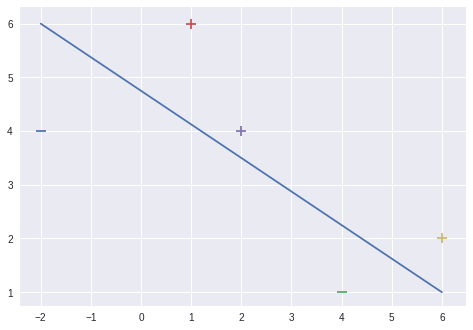

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1]])
y = np.array([-1, -1, 1, 1, 1])

#(X_train,y_train),(X_test,y_test) = train_test_split(X_data,y_data)
# w.T * X = do dai cua vector X * do dai cua trong so norm(U*v)
def sigmoid(X):
  return 1/ (1 + np.exp(-X))
# can tim gia tri cos(w,x) = 90 >>> tim gia tri w sao cho w * x = cos(90)  
import numpy.linalg as la
def kernel(x,l):
  sigma = 1 # sigma>0
  result = np.exp(-np.sqrt(la.norm(x-l),2) / (2 * sigma **2))

def _polykernel(dimension, offset):
  return lambda x, y: (offset + np.inner(x, y)) ** dimension
def svm(X,y):
  y_pred = []
  epoch = 10000
  w = np.zeros(len(X[0]))
  b = 0.0
  lr = 1

  for step in range(0,epoch):
    for i, val in enumerate(X):
      pred = np.dot(X[i], w)
      
      if y[i]*pred < 1:
        w = w + lr* (X[i] * y[i]) + lr*(-2  * (0.0001) * w)
      else:
        w = w + lr*(-2 * (0.0001) * w)
            
  for index,val in enumerate(X):
    y_pred.append(np.dot(X[index], w))
  return w, y_pred

for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)
plt.plot([-2,6],[6,1])
   


-1.7130842273037459
-1.6310021769632996
9.633557588251133
4.801980448381116
4.8567018152747465


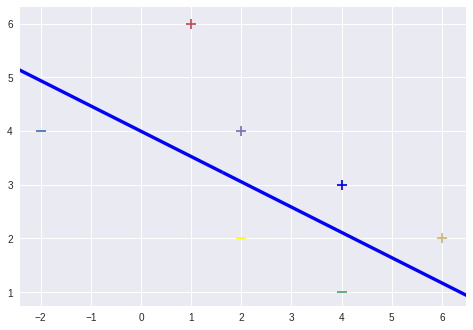

In [62]:

for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# # Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

w, y_pred = svm(X,y)

for x in X:
  print(np.dot(x, w))
# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')


In [0]:
from __future__ import division, print_function
import pandas as pd
import os 
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
datasets = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
name = ['Sepal Length','Sepal Width','Petal Length','Petal Width','Species']
def download_data(path):
  filename = (path.split('/')[-1])
  dir = os.path.join(os.path.abspath(os.path.dirname(filename)))
  r = requests.get(path,allow_redirects=True, stream = True,verify = False)
  if r.status_code == 200:    
    with open(dir + '/' + filename ,'wb') as f:
      f.write(r.content)
download_data(datasets)
print(os.path.join(datasets + '.csv'))
iris = pd.read_csv(datasets,names = name)

In [0]:
data = iris.drop('Species',axis = 1 )
target = iris['Species']


In [0]:

g = sns.lmplot(x='Sepal Length',y='Sepal Width',hue='Species',
               col='Species',
               markers=['o','x','^'],data=iris)
g_0 = sns.lmplot(x='Petal Length',y='Petal Width',hue='Species',
               col='Species',
               markers=['o','x','^'],data=iris)


In [0]:
sns.jointplot(x='Sepal Length',y='Sepal Width')

In [0]:
import seaborn as sns
sns.set(style="white", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets
iris = datasets.load_iris()
print(type(iris.data))
iris.data.shape

In [0]:
X = iris.data[:,:2]
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
print(x_min,x_max)
print(y_min,y_max)
plt.figure(2, figsize=(7, 4))
plt.clf()
ax = Axes3D(fig, elev=-150, azim=110)
fig = 